In [9]:
%pip install scipy

     ---------------------------------------- 42.2/42.2 MB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Ejercicio 1
Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

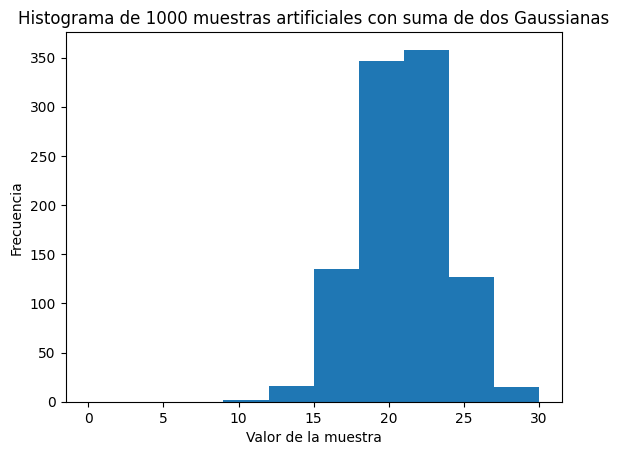

In [7]:
normal_1=np.random.normal(3, 2, 1000)
normal_2=np.random.normal(18, 2, 1000)

res=normal_1 + normal_2


plt.hist(res,10,(0,30))
plt.xlabel('Valor de la muestra')
plt.ylabel('Frecuencia')
plt.title('Histograma de 1000 muestras artificiales con suma de dos Gaussianas')
plt.show()

## Ejercicio 2

A continuación se define el método dist_euclidiana. En la parte del código dónde está el comentario "completar" debe escribir el código que permita calcular la salida de dicha función. Es decir, lleve a código la siguiente función:

$$ d(x, x^*) = \sqrt{(x_1-x_{1}^{*})^2+(x_2-x_{2}^{*})^2+...+(x_{n-1}-x_{n-1}^{*})^2+(x_n-x_{n}^{*})^2} $$

Nota: Consulte la librería scipy y si lo ve conveniente use los métodos que le puedan ayudar para resolver el laboratorio.

In [10]:
from scipy.spatial import distance

#Método para calcular la distancia entre dos vectores
def dist_euclidiana(x1, x2):
    
    #Complete el código para calcular la distancia entre x1 y x2
    dist = distance.euclidean(x1,x2) 
    
    return dist

## Ejercicio 3

Analice los siguientes métodos a la luz de la teoría vista para los modelos de K vecinos más cercanos (KNN) y ventana de Parzen. Una vez comprenda su funcionamiento proceda a completar el código del método KNN.


In [ ]:
from scipy.stats import mode
import operator

#Error cuadrático medio para los problemas de regresión
def ECM(Y_est,Y):
    N = np.size(Y)
    Y = 100*Y    #Analice la variable de salida de la base de datos y observe porque se multiplica por 100
    Y_est = 100*np.asarray(Y_est)
    ecm = sum((Y_est - Y)**2)/(2*N)
    
    return ecm

def KNN(X_train, Y_train, X_val, Y_val, knn, tipo):
    
    k = knn    #Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de
               #predicción de la variable de salida
    
    Y_est = []
    
    for x1 in X_val:
        distances = dict()    #Estudien la estrucutra de datos diccionario de Python para que comprendan el codigo
        for x2, y2 in zip(X_train, Y_train):
            distances.update({dist_euclidiana(x1,x2): y2})
    
        #k vecinos más cercanos cercanos
        vecinos = sorted(distances.items(), key=operator.itemgetter(0))
        #print vecinos
        
        #Complete aquí el código para tomar solo la variables de salida de los k vecinos más cercanos
        y_vecinos = []
        y_vecinos = [v[1] for v in vecinos][:k] 
        
        #Se calcula la variable de salida
        #Regression
        if tipo == 'regression':
            #Complete el código aquí para calcular la variable de salida en el problema de regresión
            #y_est = 
            y_est = np.mean(y_vecinos)
            Y_est.append(y_est)
        #Classification
        elif tipo == 'classification':
            #Complete el código aquí para calcular la variable de salida en el problema de clasificación
            #y_est = 
            y_est = mode(y_vecinos)[0][0]
            Y_est.append(y_est)
            
    if tipo == 'regression':
        return ECM(Y_est, Y_val)
    elif tipo == 'classification':
        return error(Y_est,Y_val)
